# Guiding questions

How much money does Columbia get from Turkey? How does that compare to other countries?

In [2]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
df = pd.read_excel('../data/ForeignGifts.xls', header=1)
df = df[ df['Institution Name'] == 'Columbia University in the City of New York' ]
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'])
df['Foreign Gift Received Date'] = pd.to_datetime(df['Foreign Gift Received Date'])

COUNTRIES = df['Country of Giftor'].unique()

df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
13633,13634,270700,Columbia University in the City of New York,New York,NY,2018-06-30,749980,Contract,THE NETHERLANDS,PORTICUS
13634,13635,270700,Columbia University in the City of New York,New York,NY,2018-06-29,250000,Monetary Gift,SWITZERLAND,Fondation des Fondateurs
13635,13636,270700,Columbia University in the City of New York,New York,NY,2018-06-27,5000000,Monetary Gift,HONG KONG,Goldenway Education Foundation Limi
13636,13637,270700,Columbia University in the City of New York,New York,NY,2018-06-27,250000,Monetary Gift,GERMANY,Wintershall Holding GmbH
13637,13638,270700,Columbia University in the City of New York,New York,NY,2018-06-26,397980,Contract,URUGUAY,"MINISTERIO DE GANADERIA, AGRICULTUR"


In [4]:
# Returns two dictionaries: monetary gifts and contracts.
# For each dict, the format is { country_name: total_amount }
def getGifts():
    monetaryGifts = defaultdict(int)
    contracts = defaultdict(int)

    for _, gift in df.iterrows():
        country = gift['Country of Giftor']
        amount = gift['Foreign Gift Amount']
        if gift['Gift Type'] == 'Monetary Gift':
            monetaryGifts[ country ] += amount
        else:
            contracts[ country ] += amount
    return monetaryGifts, contracts

def getGiftsByCountry(countries=COUNTRIES, top=0):
    gifts, contracts = getGifts()
    gifts = [gifts[c] for c in countries]
    contracts = [contracts[c] for c in countries]
    
    def countrySum(tup):
        (monetary, contract, country) = tup
        return monetary + contract
    
    output = [gifts, contracts, countries]
    sortedOutput = sorted(zip(*output), key=countrySum)[-top:]
    return zip(*sortedOutput)

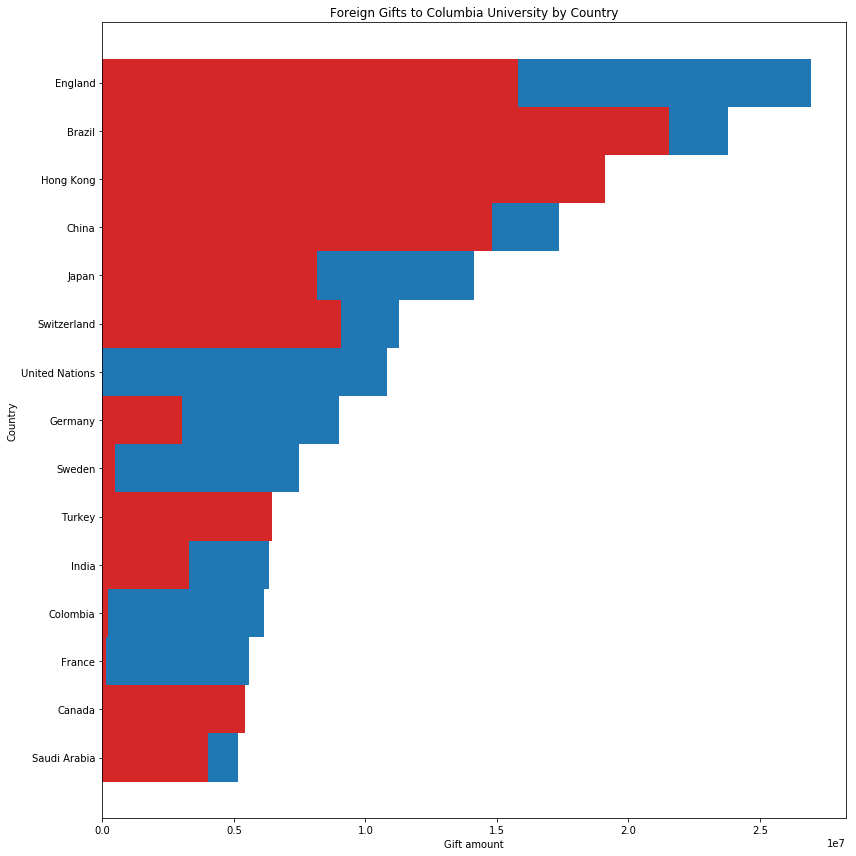

In [7]:
def plotGifts():
    plt.figure(figsize=(12, 12))
    [gifts, contracts, countries] = getGiftsByCountry(top=15)
    
    indices = np.arange(len(countries))

    width = 1
    bottom = None
    
    p1 = plt.barh(indices, gifts, width, color='#d62728', linewidth=0)
    p2 = plt.barh(indices, contracts, width, left=gifts, linewidth=0)

    # plt.legend(['Monetary gifts', 'Contracts'])
    plt.yticks(indices, [c.title() for c in countries])
    plt.ylabel('Country')
    plt.xlabel('Gift amount')
    plt.title('Foreign Gifts to Columbia University by Country')
    
plotGifts()
plt.tight_layout()
plt.savefig('top-15.pdf', transparent=True)

# Findings